In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [121]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Bag of words feature representation for descriptive text

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = CountVectorizer(ngram_range=(1,2), max_df=1)
vectorizer = TfidfVectorizer(ngram_range=(1, 3))

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 136298)

### fit Kmeans

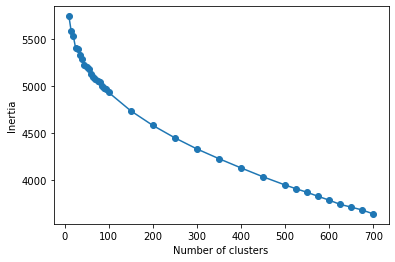

In [140]:
from sklearn.cluster import KMeans


# container to store inertia scores over iterations
distortions = []
numbers = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100, 150, 200, 250, 300, 350, 400, 450, 500, 525, 550, 575, 600, 625, 650, 675, 700]

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in numbers:
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(numbers, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### labels are named with integers and stored in the `labels_` attribute

In [141]:
km.labels_

array([389, 331, 331, ..., 292, 119, 510], dtype=int32)

### take a look at one of the cluster results

In [144]:
#rewrote code to look at all of the clusters and the counts for each

for cluster in range(0,cluster_num):
    descriptions = []
    for i in range(0,len(km.labels_)):
        if km.labels_[i] == cluster:
            descriptions.append(raw_data['product_description'][i])
    print('*****************************************************************')
    print('CLUSTER #:', cluster)
    print('DESCRIPTIONS: \n')
    print(*descriptions, sep = "\n---\n")
        
        

*****************************************************************
CLUSTER #: 0
DESCRIPTIONS: 

Cheddar & Sour Cream flavored Potato Chips packaged under the following brands and sizes:    1.  Old Dutch Ripples, 2 oz, UPC 74690-024066; 8 oz., UPC 74690-230290; and 15.5 oz., UPC 74690-205694.     2.  Old Dutch Rip-L Family Pack, 9.5oz, UPC 74690-201160  3.  Roundy's, 2 oz, UPC 11150-041430; 10.5 oz, UPC 11150-224826; and 15.75 oz, UPC 11150-224536.    4.  Urge, 2.5 oz, UPC 39779-014369; and 6 oz, UPC 39779-012617
---
Jalapeno Popper flavored Potato Chips packaged under the following brands and sizes:    1.  Old Dutch Ripples, 3 oz, UPC 74690-028590; and 8 oz., UPC 74690-231556.     2.  Roundy's, 10.5 oz, UPC 11150-224499.
---
Lund's & Byerly's Chipotle Ranch flavored Potato Chips, 8 oz., UPC 72431-009792.     
---
Old Dutch Ripples French Onion flavored Potato Chips, 2 oz., UPC 74690-023670, and 8 oz. UPC 74690-230160.     
---
Urge Ranch flavored Tortilla Chips, 8 oz., UPC 39779-013126.